## **Lab 7: Implement skip gram model to predict words within a certain range before and after the current word.**





In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import string
from nltk.corpus import stopwords

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def softmax(x):
#Compute softmax values for each sets of scores in x.
	e_x = np.exp(x - np.max(x))
	return e_x / e_x.sum()

class word2vec(object):
	def __init__(self):

#Initialize the word2vec model
		self.N = 10
		self.X_train = []
		self.y_train = []
		self.window_size = 2
		self.alpha = 0.001
		self.words = []
		self.word_index = {}

#Initialize the model parameters
	def initialize(self,V,data):
		self.V = V
		self.W = np.random.uniform(-0.8, 0.8, (self.V, self.N))
		self.W1 = np.random.uniform(-0.8, 0.8, (self.N, self.V))

		self.words = data
		for i in range(len(data)):
			self.word_index[data[i]] = i

#Compute the forward pass of the model
	def feed_forward(self,X):
		self.h = np.dot(self.W.T,X).reshape(self.N,1)
		self.u = np.dot(self.W1.T,self.h)
		#print(self.u)
		self.y = softmax(self.u)
		return self.y

#Compute the backward pass of the model
	def backpropagate(self,x,t):
		e = self.y - np.asarray(t).reshape(self.V,1)
		# e.shape is V x 1
		dLdW1 = np.dot(self.h,e.T)
		X = np.array(x).reshape(self.V,1)
		dLdW = np.dot(X, np.dot(self.W1,e).T)
		self.W1 = self.W1 - self.alpha*dLdW1
		self.W = self.W - self.alpha*dLdW

#Train the word2vec model for `epochs` epochs
	def train(self,epochs):
		for x in range(1,epochs):
			self.loss = 0
			for j in range(len(self.X_train)):
				self.feed_forward(self.X_train[j])
				self.backpropagate(self.X_train[j],self.y_train[j])
				C = 0
				for m in range(self.V):
					if(self.y_train[j][m]):
						self.loss += -1*self.u[m][0]
						C += 1
				self.loss += C*np.log(np.sum(np.exp(self.u)))
			print("epoch ",x, " loss = ",self.loss)
			self.alpha *= 1/( (1+self.alpha*x) )


#Predicts the top `number_of_predictions` words for the input word.
	def predict(self,word,number_of_predictions):
		if word in self.words:
			index = self.word_index[word]
			X = [0 for i in range(self.V)]
			X[index] = 1
			prediction = self.feed_forward(X)
			output = {}
			for i in range(self.V):
				output[prediction[i][0]] = i

			top_context_words = []
			for k in sorted(output,reverse=True):
				top_context_words.append(self.words[output[k]])
				if(len(top_context_words)>=number_of_predictions):
					break

			return top_context_words
		else:
			print("Word not found in dictionary")


In [ ]:
#Preprocess the corpus
def preprocessing(corpus):
	stop_words = set(stopwords.words('english'))
	training_data = []
	sentences = corpus.split(".")
	for i in range(len(sentences)):
		sentences[i] = sentences[i].strip()
		sentence = sentences[i].split()
		x = [word.strip(string.punctuation) for word in sentence
									if word not in stop_words]
		x = [word.lower() for word in x]
		training_data.append(x)
	return training_data

#Prepare the data for training
def prepare_data_for_training(sentences,w2v):
	data = {}
	for sentence in sentences:
		for word in sentence:
			if word not in data:
				data[word] = 1
			else:
				data[word] += 1
	V = len(data)
	data = sorted(list(data.keys()))
	vocab = {}
	for i in range(len(data)):
		vocab[data[i]] = i

#for i in range(len(words)):
	for sentence in sentences:
		for i in range(len(sentence)):
			center_word = [0 for x in range(V)]
			center_word[vocab[sentence[i]]] = 1
			context = [0 for x in range(V)]

			for j in range(i-w2v.window_size,i+w2v.window_size):
				if i!=j and j>=0 and j<len(sentence):
					context[vocab[sentence[j]]] += 1
			w2v.X_train.append(center_word)
			w2v.y_train.append(context)
	w2v.initialize(V,data)

	return w2v.X_train,w2v.y_train


In [ ]:
#Train and evaluate the word2vec model
corpus = ""
corpus += "The cat sat on the mat."
epochs = 500

training_data = preprocessing(corpus)
w2v = word2vec()

prepare_data_for_training(training_data,w2v)
w2v.train(epochs)

print(w2v.predict("cat",3))

loss = []
for epoch in range(epochs):
    loss.append(w2v.loss)



epoch  1  loss =  13.211488313661025
epoch  2  loss =  13.19345187855253
epoch  3  loss =  13.1754968004144
epoch  4  loss =  13.157640395378488
epoch  5  loss =  13.139899524043804
epoch  6  loss =  13.122290497636813
epoch  7  loss =  13.104828991263327
epoch  8  loss =  13.08752996535459
epoch  9  loss =  13.07040759620966
epoch  10  loss =  13.053475216319018
epoch  11  loss =  13.036745264928573
epoch  12  loss =  13.020229249077259
epoch  13  loss =  13.0039377151225
epoch  14  loss =  12.98788023056311
epoch  15  loss =  12.972065375784272
epoch  16  loss =  12.956500745188114
epoch  17  loss =  12.9411929570397
epoch  18  loss =  12.92614767125283
epoch  19  loss =  12.911369614263805
epoch  20  loss =  12.896862610093137
epoch  21  loss =  12.882629616673043
epoch  22  loss =  12.868672766520616
epoch  23  loss =  12.854993410858935
epoch  24  loss =  12.841592166328176
epoch  25  loss =  12.828468963482466
epoch  26  loss =  12.815623096332295
epoch  27  loss =  12.8030532722

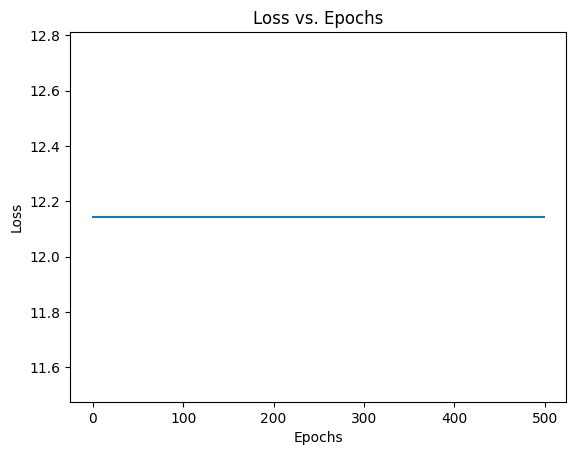

In [ ]:
plt.plot(loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs. Epochs")
plt.show()